In [9]:
import numpy as np
import matplotlib.pyplot as mlt
import pandas as pd
import seaborn as sns
import plotly.express as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [72]:
df = pd.read_csv('/Users/gurkiratpanesar/Desktop/Datasets/StudentsPerformance.csv')

### Basic Information About Data:

##### This includes a general outlook of data, statistical summary, data types, and size of dataset

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [14]:
df.shape

(1000, 8)

### Correlation Between Grades In All Three Subjects

##### 

In [15]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


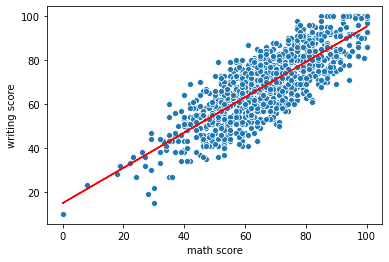

In [53]:
sns.scatterplot(df['math score'],df['writing score'])
MS = df['math score'].values.reshape(-1,1)
WS = df['writing score'].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(MS,WS)
WS_pred = lr.predict(MS)
mlt.plot(MS,WS_pred,color = 'red')

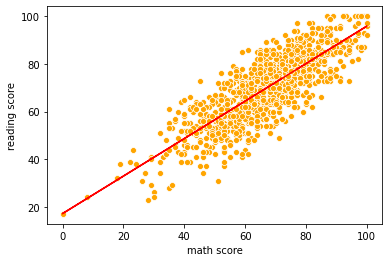

In [54]:
math_reading_corr = sns.scatterplot(df['math score'],df['reading score'],color = 'orange')
MS = df['math score'].values.reshape(-1,1)
RS = df['reading score'].values.reshape(-1,1)
lr = LinearRegression()
lr.fit(MS,RS)
RS_pred = lr.predict(MS)
mlt.plot(MS,RS_pred,color = 'red')

Text(0.5, 0, 'math score')

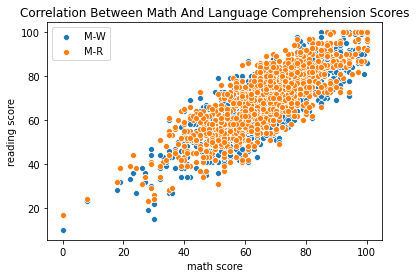

In [18]:
math_writing_corr = sns.scatterplot(df['math score'],df['writing score'])
math_reading_corr = sns.scatterplot(df['math score'],df['reading score'])
mlt.title('Correlation Between Math And Language Comprehension Scores')
mlt.legend(labels = ['M-W','M-R'])
mlt.xlabel('math score')

In [19]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [20]:
col = df.loc[:,'math score':'writing score']
df['overall average'] = round(col.mean(axis = 1))

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall average
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0


#### Parental Influence On Student Score

([<matplotlib.patches.Wedge at 0x7fa0ff71cb50>,
 [Text(0.8341981156790161, 0.7170170875213359, "bachelor's degree"),
  Text(-0.5717990621018804, 0.939705183863221, 'some college'),
  Text(-1.0543739750814827, -0.31352116462987534, "master's degree"),
  Text(-0.11383566476996158, -1.0940938905900084, "associate's degree"),
  Text(0.8112644257554884, -0.7428660925790178, 'high school'),
  Text(1.0811581857178525, -0.20272389463327067, 'some high school')],
 [Text(0.45501715400673604, 0.3911002295570922, '22.6%'),
  Text(-0.3118903975101165, 0.5125664639253932, '22.2%'),
  Text(-0.5751130773171723, -0.17101154434356833, '19.6%'),
  Text(-0.062092180783615405, -0.5967784857763682, '17.9%'),
  Text(0.44250786859390273, -0.4051996868612824, '11.8%'),
  Text(0.5897226467551923, -0.1105766697999658, '5.9%')])

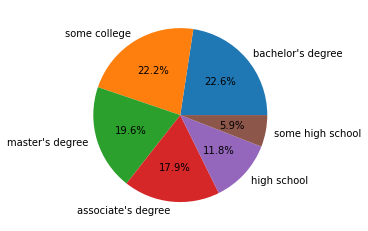

In [22]:
mlt.pie(df['parental level of education'].value_counts(),labels = df['parental level of education'].unique(),
        autopct = '%1.1f%%')

In [23]:
df.rename(columns = {'parental level of education':'parents ed'}, inplace = True)

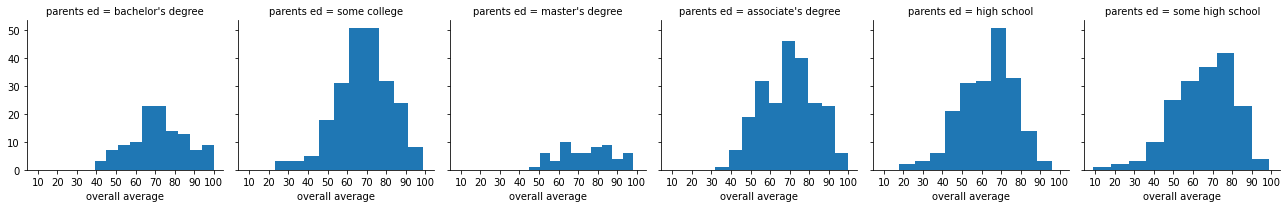

In [24]:
par = sns.FacetGrid(df, col = 'parents ed')
par.set(xticks= list(np.arange(0,110,10)))
par.map(mlt.hist, 'overall average')

In [57]:
df['fails'] = df['overall average']<50
df['class_avg'] = df['overall average'].mean()
df.head()

,gender,race/ethnicity,parents ed,lunch,test preparation course,math score,reading score,writing score,overall average,fails,student,class average,class_avg
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,False,0,67.762,67.762
1,female,group C,some college,standard,completed,69,90,88,82.0,False,1,67.762,67.762
2,female,group B,master's degree,standard,none,90,95,93,93.0,False,2,67.762,67.762
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,True,3,67.762,67.762
4,male,group C,some college,standard,none,76,78,75,76.0,False,4,67.762,67.762


In [26]:
 df['student'] = df.index.values

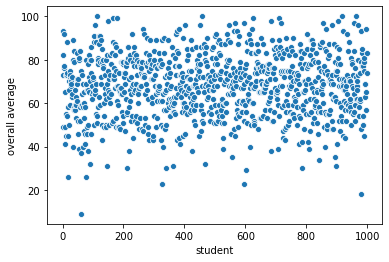

In [71]:
sns.scatterplot(df['student'],df['overall average'])

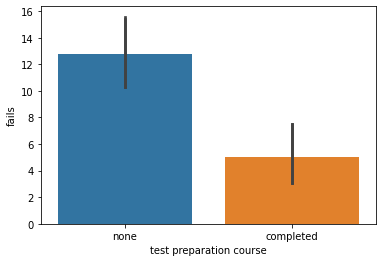

In [29]:
b1 = sns.barplot(df['test preparation course'],(df['fails'] == True)*100)
sns.barplot(df['test preparation course'],(df['fails'] == True)*100)